<a href="https://colab.research.google.com/github/prog815/lernDLpython/blob/master/regression_example_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказание стоимости недвижимости. (регрессия)

Енин А.В.

Оренбург

23.08.2019

[VK](https://vk.com/alekseyenin)
[OK](http://ok.ru/profile/404477133)
[Twitter](https://twitter.com/EninAleksey)
[FB](https://www.facebook.com/alex.prog.1)
[Telegramm](https://t.me/AleseyEnin)
[Habr](https://habr.com/ru/users/eavprog/posts/)
[VC](https://vc.ru/u/262921-aleksey-enin)
[GitHub](https://github.com/prog815/lernDLpython)

образец:

https://github.com/sozykin/dlpython_course/blob/master/regression/regression_example.ipynb


![alt text](https://github.com/prog815/lernDLpython/raw/master/bost_hous_regr.jpg)

# Подключаем библиотеки

In [1]:
from keras.datasets import boston_housing
from keras import layers
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Загружаем данные

In [0]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
x_train.shape

(404, 13)

In [4]:
x_train[-5:,:]

array([[2.19770e-01, 0.00000e+00, 6.91000e+00, 0.00000e+00, 4.48000e-01,
        5.60200e+00, 6.20000e+01, 6.08770e+00, 3.00000e+00, 2.33000e+02,
        1.79000e+01, 3.96900e+02, 1.62000e+01],
       [1.62110e-01, 2.00000e+01, 6.96000e+00, 0.00000e+00, 4.64000e-01,
        6.24000e+00, 1.63000e+01, 4.42900e+00, 3.00000e+00, 2.23000e+02,
        1.86000e+01, 3.96900e+02, 6.59000e+00],
       [3.46600e-02, 3.50000e+01, 6.06000e+00, 0.00000e+00, 4.37900e-01,
        6.03100e+00, 2.33000e+01, 6.64070e+00, 1.00000e+00, 3.04000e+02,
        1.69000e+01, 3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, 0.00000e+00, 8.71000e-01,
        5.70900e+00, 9.85000e+01, 1.62320e+00, 5.00000e+00, 4.03000e+02,
        1.47000e+01, 2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, 0.00000e+00, 4.01000e-01,
        6.60400e+00, 1.88000e+01, 6.21960e+00, 1.00000e+00, 2.65000e+02,
        1.56000e+01, 3.76700e+02, 4.38000e+00]])

# Нормализуем данные

In [5]:
train_mean = x_train.mean(axis=0)
train_mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [6]:
train_std = x_train.std(axis=0)
train_std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [0]:
norm_x_train = (x_train - train_mean)/train_std
norm_x_test = (x_test - train_mean)/train_std

# Создаем сеть

In [8]:
model = Sequential([
                    layers.Dense(128,activation='relu',input_shape=(norm_x_train.shape[1],)),
                    layers.Dense(1)])

W0823 08:55:26.271550 140423802132352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 08:55:26.290267 140423802132352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 08:55:26.293079 140423802132352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [9]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

W0823 08:55:26.321891 140423802132352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


# Обучаем сеть

In [11]:
model.fit(norm_x_train,y_train,epochs=100,batch_size=1,verbose=2)

W0823 08:55:26.453355 140423802132352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0823 08:55:26.515007 140423802132352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
 - 2s - loss: 328.9433 - mean_absolute_error: 15.3683
Epoch 2/100
 - 1s - loss: 42.4161 - mean_absolute_error: 4.3148
Epoch 3/100
 - 1s - loss: 27.0122 - mean_absolute_error: 3.5320
Epoch 4/100
 - 1s - loss: 22.3567 - mean_absolute_error: 3.2835
Epoch 5/100
 - 1s - loss: 19.4005 - mean_absolute_error: 3.1136
Epoch 6/100
 - 1s - loss: 16.8510 - mean_absolute_error: 2.9235
Epoch 7/100
 - 1s - loss: 15.1865 - mean_absolute_error: 2.7453
Epoch 8/100
 - 1s - loss: 13.4241 - mean_absolute_error: 2.5637
Epoch 9/100
 - 1s - loss: 11.7527 - mean_absolute_error: 2.4102
Epoch 10/100
 - 1s - loss: 11.3577 - mean_absolute_error: 2.3867
Epoch 11/100
 - 1s - loss: 10.8108 - mean_absolute_error: 2.2901
Epoch 12/100
 - 1s - loss: 10.1562 - mean_absolute_error: 2.2137
Epoch 13/100
 - 1s - loss: 9.6677 - mean_absolute_error: 2.1959
Epoch 14/100
 - 1s - loss: 9.6243 - mean_absolute_error: 2.1641
Epoch 15/100
 - 1s - loss: 9.3144 - mean_absolute_error: 2.1356
Epoch 16/100
 - 1s - loss: 9.3623 -

# оценка точности на обучении

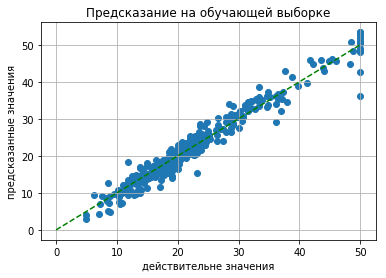

In [12]:
pred_y_train = model.predict(norm_x_train)
plt.scatter(y_train,pred_y_train)
plt.plot([0,50],[0,50],'g--')
plt.xlabel('действительне значения')
plt.ylabel('предсказанные значения')
plt.title('Предсказание на обучающей выборке')
plt.grid()
plt.show()

# Оценка точности сети в тесте

In [13]:
x_test.shape

(102, 13)

In [14]:
model.evaluate(norm_x_test,y_test)

102/102 [==============================] - 0s 487us/step


[11.48951504277248, 2.254059819614186]

средняя абсолютная ошибка в тесте 2,5 тыс$

In [15]:
pred_y_test = model.predict(norm_x_test)
pred_y_test.shape

(102, 1)

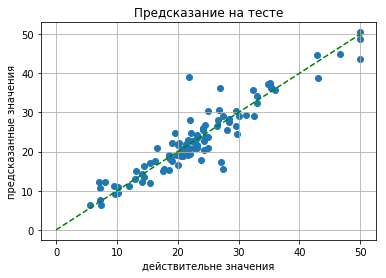

In [16]:
plt.scatter(y_test,pred_y_test)
plt.plot([0,50],[0,50],'g--')
plt.xlabel('действительне значения')
plt.ylabel('предсказанные значения')
plt.title('Предсказание на тесте')
plt.grid()
plt.show()

# Предсказываем в тесте

In [17]:
index = np.random.randint(len(y_test))
index

50

In [18]:
model.predict(norm_x_test[index:index+1,:])[0,0],y_test[index] # прогноз и действиетльное значение

(36.25227, 35.4)